## Twitter Sentiment Analysis
---

#### Overview of the Project

This projects is sed to determine the positive, negative or neutral emotions within the text of a tweet using NLP and ML Models.   

**Sentiment Analysis** refers to identifying and categorizing the emotions represented in the text source.
When analyzed, tweets may provide a significant quantity of sentiment data. These statistics help us understand how individuals feel about a range of issues on social media.

**For this project** we will be using  CRISP-DM (Cross-Industry Standard Process for Data Mining) model, let's go through the project steps and then I'll provide a sample report summarizing the project.

## 1.0  Business Understanding
---
This project's goal is to create a Twitter sentiment analysis model utilizing Logistic Regression methods. The model will be trained on a labeled dataset of tweets before being tested on the testing data. This sentiment analysis methodology may give useful insights into public sentiment and attitudes on certain issues.


### Import the Necessary Library
---



In [33]:
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

## 2. Data Understanding
---
This project's dataset is a JSON file with 6443 elements representing tweets from the social media network Twitter, spanning 6 subjects. These tweets were taken from Twitter and human-labeled using Amazon's Mechanical Turk between 2019 and 2021.

The categories of tweet cover a variety of topics, namely:
0. Arts & Culture
1. Business & Entrepreneurs
2. Pop Culture
3. Daily Life
4. Sports & Gaming
5. Science & Technology


In [34]:
# importing the dataset

df = pd.read_json('CETM47-22_23-AS2-Data.json')

In [35]:
print(df)

                                                   text       date  label  \
0     The {@Clinton LumberKings@} beat the {@Cedar R... 2019-09-08      4   
1     I would rather hear Eli Gold announce this Aub... 2019-09-08      4   
2     Someone take my phone away, I’m trying to not ... 2019-09-08      4   
3     A year ago, Louisville struggled to beat an FC... 2019-09-08      4   
4     Anyone know why the #Dodgers #Orioles game nex... 2019-09-08      4   
...                                                 ...        ...    ...   
6438  Praying for {{USERNAME}} family friends riding... 2021-08-29      3   
6439  Etsy: {{USERNAME}} Hi there, I m sorry to hear... 2021-08-29      1   
6440  Imagine how hard it is to be a Teume. Everyone... 2021-08-29      2   
6441  Ride With Me - Mental Health Awareness Charity... 2021-08-29      2   
6442  Prediction: The future of CX in {@McKinsey Com... 2021-08-29      1   

                       id                label_name  
0     117051632441986

In [36]:
df.sample(10)

,text,date,label,id,label_name
239,Currently watching the Doco - Climate Change -...,2019-09-28,2,1177883660835385344,pop_culture
6349,[P] I just watched The Suicide Squad. I can’t ...,2021-08-08,2,1424243341873590272,pop_culture
2775,Demon’s Souls could be closer than expected if...,2020-08-21,4,1296717238792323073,sports_&_gaming
3189,Coz {@Stray Kids@} got AAA best music video aw...,2020-11-29,2,1333198555234791424,pop_culture
3147,"someone said enhypen is running, not walking. ...",2020-11-15,2,1328122647998173184,pop_culture
1813,EDWARD BARBER sings Please Stay {{URL}} via ...,2020-03-29,2,1244201252256223232,pop_culture
3131,great stat about {@Colorado Buffaloes Football...,2020-11-15,4,1327820119448330242,sports_&_gaming
6178,stream on the ground I nominate #ROSÉ of {@B...,2021-07-04,2,1411592139075690500,pop_culture
1814,FINALLY some decent virus viewing on the TV - ...,2020-03-29,4,1244230681837920258,sports_&_gaming
1420,Check out Patrick Mahomes Chiefs Autograph Nam...,2020-02-09,4,1226460470128803841,sports_&_gaming


In [37]:
# Let explore the label_name categroy
unique_label = df.label_name.nunique()
unique_label

6

In [38]:
# Let check the shape of the data
print(df.shape)
print('There are {} rows and {} columns in the dataset'.format(df.shape[0],df.shape[1]))

(6443, 5)
There are 6443 rows and 5 columns in the dataset


In [39]:
# Getting the data info
df.info()
# The dataset in this project is a clean data without null values. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6443 entries, 0 to 6442
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   text        6443 non-null   object        
 1   date        6443 non-null   datetime64[ns]
 2   label       6443 non-null   int64         
 3   id          6443 non-null   int64         
 4   label_name  6443 non-null   object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 251.8+ KB


In [40]:
# Let further check for null values 
df.isnull().value_counts()
# This further assures that there is no null label in the dataframe

text   date   label  id     label_name
False  False  False  False  False         6443
dtype: int64

pop_culture                 0.389880
sports_&_gaming             0.355580
daily_life                  0.137048
science_&_technology        0.050598
business_&_entrepreneurs    0.044544
arts_&_culture              0.022350
Name: label_name, dtype: float64 
 Counts of label_name in percentage


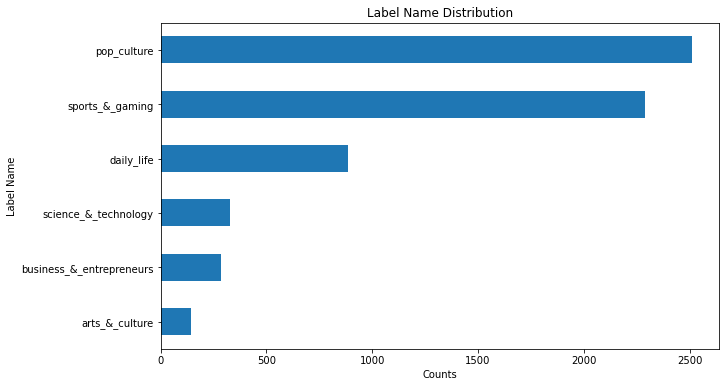

In [41]:
# Let explore the label_name which serves as our target column
print(df.label_name.value_counts(normalize=True), '\n Counts of label_name in percentage') 
# Let visualize the counts 
df.label_name.value_counts().sort_values(ascending=True).plot(kind='barh',figsize=(10,6))
plt.xlabel('Counts')
plt.ylabel('Label Name')
plt.title('Label Name Distribution')
plt.show()

In [42]:
# Let count each tweet by date 
tweet_date = df.groupby('date')['date'].transform('count')

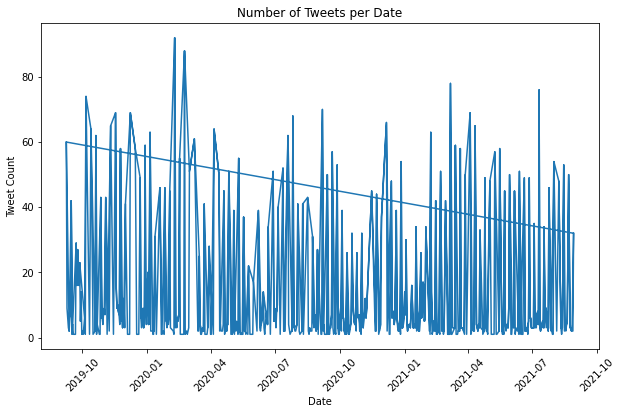

In [43]:
# Create a line chart
plt.figure(figsize=(10, 6))
plt.plot(df['date'], tweet_date, linestyle='-')
plt.xlabel('Date')
plt.ylabel('Tweet Count')
plt.title('Number of Tweets per Date')
plt.xticks(rotation=45)

# Display the chart
plt.show()

#### cleaning the text column


In [44]:
# making the column lowercase
df['text'] = df['text'].str.lower()
df['text'].tail()

6438    praying for {{username}} family friends riding...
6439    etsy: {{username}} hi there, i m sorry to hear...
6440    imagine how hard it is to be a teume. everyone...
6441    ride with me - mental health awareness charity...
6442    prediction: the future of cx in {@mckinsey com...
Name: text, dtype: object

In [45]:
# Defining set containing all stopwords in English.
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [46]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df['text'] = df['text'].apply(lambda text: cleaning_stopwords(text))
df['text'].head()

0    {@clinton lumberkings@} beat {@cedar rapids ke...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away, i’m trying not look {...
3    year ago, louisville struggled beat fcs oppone...
4    anyone know #dodgers #orioles game next thursd...
Name: text, dtype: object

In [47]:
# Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df['text']= df['text'].apply(lambda x: cleaning_punctuations(x))
df['text'].tail()

6438    praying username family friends riding ida saf...
6439    etsy username hi there sorry hear account clos...
6440    imagine hard teume everyone against us but loo...
6441    ride  mental health awareness charity cycle ri...
6442    prediction future cx mckinsey company quarterl...
Name: text, dtype: object

In [48]:
# Cleaning and removing repeating character 
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
df['text'] = df['text'].apply(lambda x: cleaning_repeating_char(x))
df['text'].tail()

6438    praying username family friends riding ida saf...
6439    etsy username hi there sorry hear account clos...
6440    imagine hard teume everyone against us but loo...
6441    ride  mental health awareness charity cycle ri...
6442    prediction future cx mckinsey company quarterl...
Name: text, dtype: object

In [49]:
# Cleaning and removing URl's
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
df['text'] = df['text'].apply(lambda x: cleaning_URLs(x))
df['text'].tail()

6438    praying username family friends riding ida saf...
6439    etsy username hi there sorry hear account clos...
6440    imagine hard teume everyone against us but loo...
6441    ride  mental health awareness charity cycle ri...
6442    prediction future cx mckinsey company quarterl...
Name: text, dtype: object

In [50]:
# Cleaning and removing numeric characters
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df['text'] = df['text'].apply(lambda x: cleaning_numbers(x))
df['text'].tail()

6438    praying username family friends riding ida saf...
6439    etsy username hi there sorry hear account clos...
6440    imagine hard teume everyone against us but loo...
6441    ride  mental health awareness charity cycle ri...
6442    prediction future cx mckinsey company quarterl...
Name: text, dtype: object

### Applying Stemming
---

Words are sometimes shortened to their roots (or "stems") as part of a sentiment analysis.    
As a result, the dimensionality of the text data may be decreased and words can be normalised. 



In [51]:
import nltk 
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df['text']= df['text'].apply(lambda x: stemming_on_text(x))
df['text'].head()

0    clinton lumberkings beat cedar rapids kernels ...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away i’m trying not look ch...
3    year ago louisville struggled beat fcs opponen...
4    anyone know dodgers orioles game next thursday...
Name: text, dtype: object

#### Apply Lemmatization
---

Lemmatization is the process of changing a word to its lemma, or dictionary form.   
The lemma stands for the standard or authoritative use of a term. Lemmatization uses morphological analysis informed by the word's POS to produce the correct lemma.

In [62]:
from nltk.stem import WordNetLemmatizer
lm = nltk.WordNetLemmatizer()
nltk.download('wordnet')
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
df['text'] = df['text'].apply(lambda x: lemmatizer_on_text(x))
df['text'].head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


0    clinton lumberkings beat cedar rapids kernels ...
1    would rather hear eli gold announce auburn gam...
2    someone take phone away i’m trying not look ch...
3    year ago louisville struggled beat fcs opponen...
4    anyone know dodgers orioles game next thursday...
Name: text, dtype: object

#### Separating input feature and label



In [63]:
X = df.text
y = df.label

Train and Spliting Data

In [64]:
# Separating the 70% data for training data and 30% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30, random_state = 1)

####  Transforming the Dataset Using TF-IDF Vectorizer
Fit the TF-IDF Vectorizer

In [65]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  77634


In [66]:
# Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

### Building Logistic Regression Model

In [67]:
from sklearn.metrics import roc_curve, auc
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
y_pred = LRmodel.predict(X_test)

### Evaluation
---
##### jaccard index
Lets try jaccard index for accuracy evaluation. we can define jaccard as the size of the intersection divided by the size of the union of two label sets. If the entire set of predicted labels for a sample strictly match with the true set of labels, then the subset accuracy is 1.0; otherwise it is 0.0.

In [68]:
from sklearn.metrics import jaccard_score
jacard_value = round(jaccard_score(y_test, y_pred, average= 'macro'),3)
print(' The model accuary is ',jacard_value)

 The model accuary is  0.372


### confusion matrix
---
Another way of looking at accuracy of classifier is to look at confusion matrix.

In [72]:
from sklearn.metrics import confusion_matrix

# Make predictions on the testing data
y_pred = LRmodel.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print("Confusion Matrix:")
print(cm)


Confusion Matrix:
[[  0   0  27  19   5   0]
 [  0  14  28  11  28   1]
 [  0   0 660  13  49   3]
 [  0   3 102 138  51   1]
 [  0   1  42   6 624   1]
 [  0   0  41   9  28  28]]


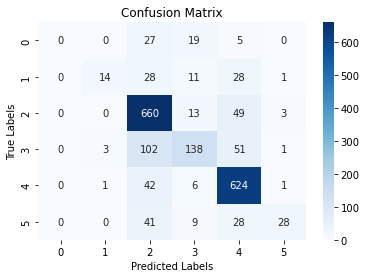

In [86]:
# Visualizing the confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')

# Add labels, title, and axis ticks

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [80]:
# Model Evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Make predictions on the testing data
y_pred = LRmodel.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average= 'macro')
recall = recall_score(y_test, y_pred,average= 'macro')
f1 = f1_score(y_test, y_pred,average= 'macro')

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

Accuracy: 0.7573719606828764
Precision: 0.6389377690212673
Recall: 0.45647335203464506
F1-score: 0.48496770268552686


C:\Users\User\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


*Interpretation*
---

- The accuracy metric evaluates the general accuracy of the forecasts generated by the model. The precision of 0.7574 indicates that the model's predictions on the testing data were accurate approximately 75.74% of the time.
- The concept of precision pertains to the proportion of accurately predicted positive labels in a given dataset. The precision value of 0.6389 denotes that nearly 63.89% of the instances that were predicted as positive were true positives, whereas the remaining 36.11% were false positives.
- The recall metric, also referred to as sensitivity or true positive rate, denotes the ratio of correctly identified actual positive instances by the model. A recall score of 0.4565 indicates that the model accurately identified roughly 45.65% of the positive instances.
- The F1-score is a statistical measure that represents the harmonic mean of precision and recall. The metric offers an equitable evaluation of the model's efficacy by considering both precision and recall. A superior overall performance is indicated by a higher F1-score. The obtained F1-score of 0.4850 indicates a moderate level of performance in this particular case.


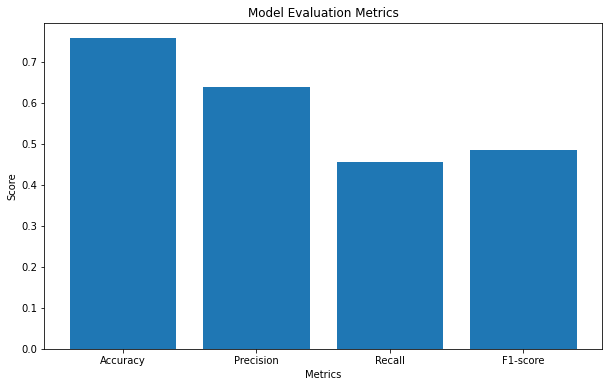

In [84]:
# Define the evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-score']
values = [accuracy, precision, recall, f1]

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(metrics, values)
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Model Evaluation Metrics')
plt.show()

In [102]:
# Preprocess new text data
# Let use input for collecting new word
new_text = input('Enter a text here')  # Wrap the new text in a list
new_text = [str(new_text)]

# Transform preprocessed text into numerical features
new_features = vectoriser.transform(new_text)  # Use transform instead of fit

# Make predictions on the new data
new_prediction = LRmodel.predict(new_features)
print("Predicted sentiment:", new_prediction)


Enter a text hererobot
Predicted sentiment: [2]


The categories of tweet cover a variety of topics, namely:
0. Arts & Culture
1. Business & Entrepreneurs
2. Pop Culture
3. Daily Life
4. Sports & Gaming
5. Science & Technology

In [94]:
new_text = input('Enter a text here')  # Wrap the new text in a list
text = print(new_text)

Enter a text heremango
mango
